## CAS 2020 Python Workshop: Session II Pandas

## Session Descriptions

Welcome to CAS Python Workshop

| No | Date       |Lead |   Contents  |
|:---|:-----------|:----|:------------------------------------------------------------------|
| 1  |  July 15   | BF  | Python programming basics variables, types, lists, dictionaries, functions, dates, strings, dir, help Simulated transactional data, computing Earned Premium (see 5)
| **2**  |  **July 22**   | **SM**  | **Pandas 1: DataFrame creation and basic data manipulation; make a triangle, make development factors, make an exhibit from the CAS Loss Reserve Database**
| 3  |  July 29   | BF  | Pandas 2: data io with external sources: Excel, CSV, markdown, HTML, web; advanced data manipulation: querying, merging, indexes, stack, unstack, pivot-table, tidydata Prem and loss simulated data…
| 4  |  Aug 5     | SM  | Pandas 3: Visualization and Reporting plotting plus matplotlib, geopandas, jinja, COVID data, NY Auto data
| 5  |  Aug 12    | SM  | Simulation modeling, pandas, numpy, scipy.stats Cat model Creating data for session 1
| 6  |  Aug 19    | BF  | Linear regression, lm, glm, sklearn Triangles analysis


## Session II Agenda: `pandas`

* Recall from Session I: lists, dictionaries, functions
* Two handy Python user-defined functions
* `pandas` Introduction
* Creating DataFrames and Accessing Elements
* Extracting information from DataFrames
* Plotting: Bar Chart, Scatter Plot, Histograms
* Web data access
* Grouping and Aggregation
* Stacking and Pivoting
* Triangles...


### Reference: Functions We Will Discuss
* `DataFrame`, `Series`

* `head`, `tail`

* `unique`, `value_counts`

* `read_csv`

* `loc`, `slices`, `xs`

* `query`

* `pivot`, `stack` `and` `unstack`

* `pivot_table`

* `groupby` (.`groups`, .`get_group`, `as_index`)

* `sum`, `mean`, `std` `etc`.

* `aggregate`

* `plot`


MISSING
* `describe`
* `create_index`
* `reset_index`
* `MultiIndex`
* **`concat`**
* `append`
* `keys`

|  Slot | Tasks     | Functions                                                                              |
|------:|:----------|:---------------------------------------------------------------------------------------|
|  0-10 | Intro     | sdir, help, np.random (rand, lognormal, binomial choice, poisson), dictionaries        |
| 10-20 | Create df | from dictionary, from array; access row, access column; indexes, name indexes; sorting |
| 20-30 | Claims df | integer indexes, multi index, grouping, histogram; type of claim
| 30-40 | Premium df | merging,
| 40-50 |
| 50-60 |
| 60-70 |
| 70-80 |
| 80-90 |


## Recall from Session 1: lists and indexing

In [2]:
a = [1,2,3,4,6]

a[1], a[3:], a[-2], a[-2:], a[::-1]

(2, [4, 6], 4, [4, 6], [6, 4, 3, 2, 1])

### Custom functions

In [3]:
def myfunction(x):
    return x * 10

myfunction(20)

200

### Dictionaries and comprehensions

Count letters in a sentence with a dictionary comprehension. Remember dictionaries are  {key: value}  pairs.

In [6]:
def letter(s, omit=''):
    return { i : s.count(i) for i in s if i not in omit }

In [8]:
letter(s)

NameError: name 's' is not defined

In [9]:
letter(s, ' aeiou')

NameError: name 's' is not defined

### Exact same function counts words(!!!)
`split` breaks a string into words.

In [10]:
print(s.split())

letter(s.split())

NameError: name 's' is not defined

## Handy Utility Functions

* `dir`: what can a function do?
* `sdir`: better version of `dir`
* `all_doc`: all the documentation on a function

In [11]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


### (a) What Can a Function Do?

There is no distinction between a variable, data and a function. All equal citizens to Python.

In [12]:
def sdir(x, colwidth=80):
    """
    Directory of useful elements, wrapped
    """
    from textwrap import fill

    # all the work is in this line:
    l = [i for i in dir(x) if i[0] != '_']

    # frills to printout nicely
    mx = max(map(len, l))
    mx += 2
    fs = f'{{:<{mx:d}s}}'
    l = [fs.format(i) for i in l if i[0] != '_']
    print(fill('\t'.join(l), colwidth))

sdir(str)

capitalize      casefold        center          count           encode
endswith        expandtabs      find            format          format_map
index           isalnum         isalpha         isascii         isdecimal
isdigit         isidentifier    islower         isnumeric       isprintable
isspace         istitle         isupper         join            ljust
lower           lstrip          maketrans       partition       replace
rfind           rindex          rjust           rpartition      rsplit
rstrip          split           splitlines      startswith      strip
swapcase        title           translate       upper           zfill


### (b) Get all the Help
`?function` or `help(function)` shows the help on a function. Custom functions can have help: the string immediately after the declaration.

In [14]:
def all_doc(obj):
    """
    print the documentation on every public callable method of obj
    """

    s = f'{str(obj)} (type={type(obj)}) Documentation'
    print(f'{s}\n{"="*len(s)}\n\ntype={type(obj)})\n\nMETHODS\n=======\n')

    # iterate over methods
    for x in dir(obj):
        if x[0] != '_':
            # get the method
            method = getattr(obj, x)
            if callable(method):
                # if it is callable, i.e. a function, show help
                # help lives in obj.__doc__
                print(f'{x}\n{"~"*len(x)}\n{method.__doc__}\n')

all_doc(bytes)

<class 'bytes'> (type=<class 'type'>) Documentation

type=<class 'type'>)

METHODS

capitalize
~~~~~~~~~~
B.capitalize() -> copy of B

Return a copy of B with only its first character capitalized (ASCII)
and the rest lower-cased.

center
~~~~~~
B.center(width[, fillchar]) -> copy of B

Return B centered in a string of length width.  Padding is
done using the specified fill character (default is a space).

count
~~~~~
B.count(sub[, start[, end]]) -> int

Return the number of non-overlapping occurrences of subsection sub in
bytes B[start:end].  Optional arguments start and end are interpreted
as in slice notation.

decode
~~~~~~
Decode the bytes using the codec registered for encoding.

  encoding
    The encoding with which to decode the bytes.
  errors
    The error handling scheme to use for the handling of decoding errors.
    The default is 'strict' meaning that decoding errors raise a
    UnicodeDecodeError. Other possible values are 'ignore' and 'replace'
    as well as any other 

## The Zen of Python
`import this`

    The Zen of Python, by Tim Peters

    Beautiful is better than ugly.
    Explicit is better than implicit.
    Simple is better than complex.
    Complex is better than complicated.
    Flat is better than nested.
    Sparse is better than dense.
    Readability counts.
    Special cases aren't special enough to break the rules.
    Although practicality beats purity.
    Errors should never pass silently.
    Unless explicitly silenced.
    In the face of ambiguity, refuse the temptation to guess.
    There should be one-- and preferably only one --obvious way to do it.
    Although that way may not be obvious at first unless you're Dutch.
    Now is better than never.
    Although never is often better than *right* now.
    If the implementation is hard to explain, it's a bad idea.
    If the implementation is easy to explain, it may be a good idea.
    Namespaces are one honking great idea -- let's do more of those!

# Module 1: Introduction

* Libraries for today: `numpy` (`np`), `pandas` (`pd`), `matplotlib`, `matplotlib.pyplot` (`plt`)

* `np.random`, `rand`, `lognormal`, `choice`, `poisson`

* Select from list `np.random.choice(list('ABCDE'), 10)`

* Select from list, non-uniform prior `np.random.choice(list('ABCDE'), 10, p=[.4,.3,.2,.05,.05])`

* Dictionaries and dictionary comprehension: count letters in a sentence, `f = {i: s.count(i) for i in set(s)}`; apply to random selection using `''.join()` or convert to `list`

* Start by importing, very important!

In [64]:
import numpy as np

r_letters = np.random.choice(list('ABCDE'), 10)

r_unif = np.random.rand(10)

r_lognorm = np.random.lognormal(10, .2, 10)

r_letters, r_unif, r_lognorm

(array(['E', 'D', 'C', 'D', 'E', 'B', 'B', 'D', 'C', 'A'], dtype='<U1'),
 array([0.49643807, 0.42910714, 0.58009389, 0.2314126 , 0.81114589,
        0.05160499, 0.89759863, 0.78164086, 0.1689136 , 0.93709582]),
 array([18982.33145964, 20873.64286853, 20883.50117287, 18727.36697287,
        27449.04778703, 24050.54719964, 17389.78055799, 20148.03719253,
        16738.47483945, 27376.9155642 ]))

## Exercise

* Simulate random letters from ABCDEF...

* Summarize by letter and check you get distribution you expect, convert sample to list using `list(...)`

* Add a prior distribution

* Summarize again and check you get distribution you expect

### solutions to exercise

In [17]:
letters = list(np.random.choice(list('ABCDE'), 500, p=[.4,.3,.2,.05,.05]))
n = len(letters)

freq = { i: letters.count(i) / n for i in 'ABCDE'}

freq

{'A': 0.382, 'B': 0.284, 'C': 0.224, 'D': 0.068, 'E': 0.042}

# Module 2: Create a DataFrame and Access Elements
Finally, Pandas: your spreadsheet in Python.

## Creating a DataFrame
* Create from dictionary: keys become column names.

* Create from list of lists

* Allows mixed data types.
workd
* Nice Jupyter Lab output.

* Row and column indexes in bold

* Again, start with import!

In [18]:
import pandas as pd

df  = pd.DataFrame({'a': range(100, 110),
                    'b' : np.random.choice(list('ABCDEF'), 10),
                    'c' : np.random.rand(10),
                    'd': pd.to_datetime('2020/07/05')+pd.to_timedelta(np.arange(10), unit='D')
                    })
df

,a,b,c,d
0,100,A,0.139423,2020-07-05
1,101,C,0.066108,2020-07-06
2,102,B,0.494365,2020-07-07
3,103,D,0.729487,2020-07-08
4,104,F,0.230831,2020-07-09
5,105,A,0.342319,2020-07-10
6,106,E,0.469924,2020-07-11
7,107,F,0.318743,2020-07-12
8,108,B,0.433961,2020-07-13
9,109,A,0.618365,2020-07-14


## Accessing Data within a DataFrame

* Access column as item and attribute

* Access row or element using  `loc` for row, both

* Access with logic: `df.c < .25`,  `query`

* Slicing with `loc`, `df.loc[1:4, 'a':'c']` **includes endpoints**; no well defined notion of the *one before* the end

* Integer indexing `iloc`

* `query`

* `display` vs. `print`; intermediate results vs. final result

In [19]:
df['a'], df.a

(0    100
 1    101
 2    102
 3    103
 4    104
 5    105
 6    106
 7    107
 8    108
 9    109
 Name: a, dtype: int64,
 0    100
 1    101
 2    102
 3    103
 4    104
 5    105
 6    106
 7    107
 8    108
 9    109
 Name: a, dtype: int64)

## Accessing Data within a DataFrame: Row Index

In [20]:
df.loc[3]

a                    103
b                      D
c               0.729487
d    2020-07-08 00:00:00
Name: 3, dtype: object

## Accessing Data Within a DataFrame: Row and Column Index

In [21]:
df.iloc[::2]

,a,b,c,d
0,100,A,0.139423,2020-07-05
2,102,B,0.494365,2020-07-07
4,104,F,0.230831,2020-07-09
6,106,E,0.469924,2020-07-11
8,108,B,0.433961,2020-07-13


## Accessing Data Within a DataFrame: Logic

In [22]:
df.a < 105

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: a, dtype: bool

## Accessing Data Within a DataFrame: Logic

In [23]:
df.loc[df.a < 105]

,a,b,c,d
0,100,A,0.139423,2020-07-05
1,101,C,0.066108,2020-07-06
2,102,B,0.494365,2020-07-07
3,103,D,0.729487,2020-07-08
4,104,F,0.230831,2020-07-09


### Accessing Data Within a DataFrame: The Query Operator

* Very powerful, very fast

* SQL like

* Access elements with @

In [24]:
df.query(' .4 < c < .8 ')

,a,b,c,d
2,102,B,0.494365,2020-07-07
3,103,D,0.729487,2020-07-08
6,106,E,0.469924,2020-07-11
8,108,B,0.433961,2020-07-13
9,109,A,0.618365,2020-07-14


### Add Data
* Create new columns with math, from old columns

* Create new row

* Can't create on the fly like tidyverse

In [25]:
df['E'] = df.a / df.c

df.loc[100, :] = (110, 'Z', .11223344, pd.to_datetime('2020/11/03'), np.nan)

display(df)

,a,b,c,d,E
0,100.0,A,0.139423,2020-07-05,717.241672
1,101.0,C,0.066108,2020-07-06,1527.795068
2,102.0,B,0.494365,2020-07-07,206.325227
3,103.0,D,0.729487,2020-07-08,141.195031
4,104.0,F,0.230831,2020-07-09,450.545889
5,105.0,A,0.342319,2020-07-10,306.731233
6,106.0,E,0.469924,2020-07-11,225.568208
7,107.0,F,0.318743,2020-07-12,335.693370
8,108.0,B,0.433961,2020-07-13,248.870404
9,109.0,A,0.618365,2020-07-14,176.271371


## Exercise

Add a column F equal to E * c, check it equals a

Remember everything is case sensitive!

### Solution

In [26]:
df['F'] = df.E * df.c

df.F == df.a

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9      False
100    False
dtype: bool

...wait, what?


## Sorting

* `sort_values` and `sort_index`: return a new object; `ascending=False` for descending order

In [27]:
df.sort_values('c')

,a,b,c,d,E,F
1,101.0,C,0.066108,2020-07-06,1527.795068,101.0
100,110.0,Z,0.112233,2020-11-03,NaN,NaN
0,100.0,A,0.139423,2020-07-05,717.241672,100.0
4,104.0,F,0.230831,2020-07-09,450.545889,104.0
7,107.0,F,0.318743,2020-07-12,335.693370,107.0
5,105.0,A,0.342319,2020-07-10,306.731233,105.0
8,108.0,B,0.433961,2020-07-13,248.870404,108.0
6,106.0,E,0.469924,2020-07-11,225.568208,106.0
2,102.0,B,0.494365,2020-07-07,206.325227,102.0
9,109.0,A,0.618365,2020-07-14,176.271371,109.0


## Exercise
* Create function to take a string, make lower case, break it into words, and create a DataFrame with columns `word`  and `freq` counting word frequency

* Reconsider your approach if you go beyond five lines of code...

* *Optionally* make case independent, default arguments `case=False` argument

* Optionally sort output by descending freq

* Extra credit: strip out punctuation

### Solution

In [28]:
def word_count(s):
    """
    always document here!
    """
    word_list = s.lower().split()
    df = pd.DataFrame([[i, word_list.count(i)] for i in set(word_list)], columns=['word', 'freq'])
    return df

def word_count_ex(s, excluded_chars='",\';:()[]!?@#$%&=\\.'):
    """"
    word counter with excluded characters
    """
    for i in excluded_chars:
        s = s.replace(i, ' ')
    # which is kinda yucky
    word_list = s.lower().split()
    df = pd.DataFrame([[i, word_list.count(i)] for i in set(word_list)], columns=['word', 'freq'])
    df['letters'] = df.word.str.len()
    df = df.sort_values('letters', ascending=False)
    return df

* Apply to `In[xx]`

# Module 3: Requests (interlude) and Graphics

## Read Longer Document
* read longer document, *The Declaration of Independence* (`di`)

* `requests` library for Internet calls

* create data frame of word count etc., using previous function

In [29]:
import requests

r = requests.get('http://www.mynl.com/RPM/di.txt')

di = r.text

print(di[:100])

df = word_count_ex(di)

df

Congress, July 4, 1776.
The unanimous Declaration of the thirteen united States of America, When in


,word,freq,letters
79,representatives,1,15
332,undistinguished,1,15
272,correspondence,1,14
81,appropriations,1,14
278,naturalization,1,14
...,...,...,...
257,as,4,2
540,in,19,2
371,a,16,1
459,s,1,1


## Exercise

Sort `df` by descending frequency

### Solution

Often helpful to only show `head` or `tail`


In [30]:
df.sort_values('freq', ascending=False).head(10)

,word,freq,letters
266,the,78,3
348,of,78,2
75,to,65,2
462,and,56,3
64,for,29,3
469,our,26,3
394,has,20,3
467,their,20,5
540,in,19,2
535,he,19,2


## Exercise

Show five most common words that occur at least 10 times and that have five or more letters, sorted descending order by frequency.

Note use of `\` for line continuation; nothing can appear after it!

Indentation after first `df` is free-form.

### Solution

In [31]:
df.query(' freq >= 10 and letters >= 5 '). \
    sort_values('freq', ascending=False). \
    head(5)

,word,freq,letters
467,their,20,5
343,these,13,5
477,people,10,6
349,which,10,5


## Graphics! The Bar Chart

* Bar chart of word freq

* `bar` for vertical and `barh` for horizontal

* Subset to longer words using Exercise

* Breakdown `set_index` statement

,freq,letters
word,,
their,20,5
these,13,5
people,10,6
which,10,5
states,8,6
right,7,5
government,6,10
powers,5,6
among,5,5


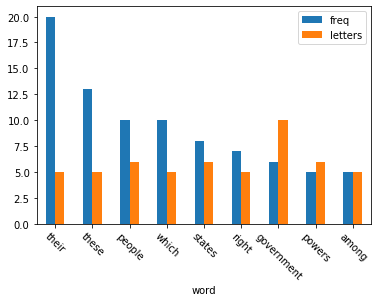

In [32]:
bit = df.query(' freq >= 5 and letters >= 5 '). \
    sort_values('freq', ascending=False). \
    head(10). \
    set_index('word')

display(bit)
bit.plot(kind='bar', rot=315)

## Just Plot Frequency, Not Letters

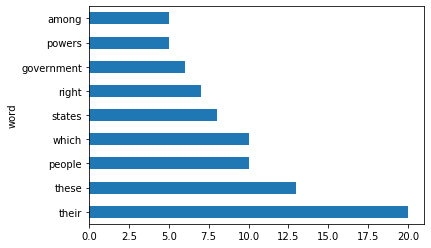

In [33]:
bit['freq'].plot(kind='barh')

## `[x]` vs `[[x]]` is the Same as R

* `bit['freq']` returns a  Pandas `Series` object
* `bit[['freq']]` returns a  Pandas `DataFrame` object

In [34]:
display(bit['freq'])
display(bit[['freq']])

word
their         20
these         13
people        10
which         10
states         8
right          7
government     6
powers         5
among          5
Name: freq, dtype: int64

,freq
word,
their,20
these,13
people,10
which,10
states,8
right,7
government,6
powers,5
among,5


## Scatter Plot
* Scatter plot: frequency vs. number of letters

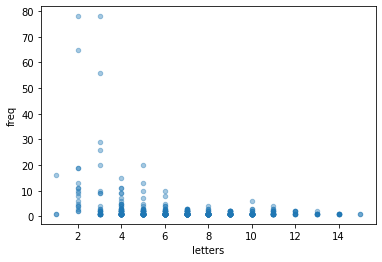

In [35]:
df.plot(kind='scatter', x='letters', y='freq', marker='o', alpha=0.4)

## Exercise
* Jitter number of letters and re-plot, i.e., add a new column equal to the number of letters plus a small random number
* Explore alpha, different markers, e.g., `'x'`, change marker size `s=2`

### Solutions

`lw` sets the line width


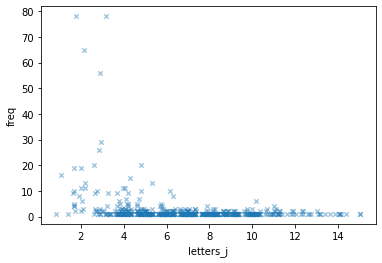

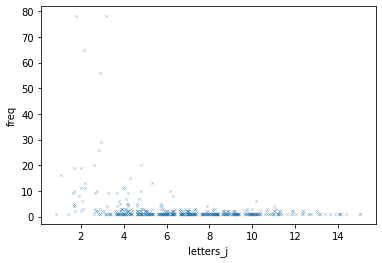

In [36]:
df['letters_j'] = df.letters + np.random.rand(len(df)) * .8 - 0.4
df.plot(kind='scatter', x='letters_j', y='freq', marker='x', alpha=0.4)
df.plot(kind='scatter', x='letters_j', y='freq', marker='x', s=10, lw=.25, alpha=0.8)

## Nicer Plots and Plot Decorations

[Text(0, 0.5, 'Word Frequency'),
 Text(0.5, 0, '(Jitterd) Number of Letters'),
 Text(0.5, 1.0, 'My Title')]

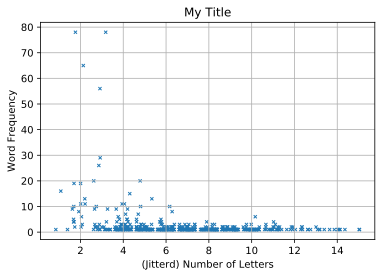

In [37]:
%config InlineBackend.figure_format = 'svg'

ax = df.plot(kind='scatter', x='letters_j', y='freq', marker='x', s=10, lw=1)
ax.grid()
ax.set(title='My Title', xlabel='(Jitterd) Number of Letters', ylabel='Word Frequency')

## Extended Exercise
* Create data frame with [100+] claims, loss=lognormal(10,1), kind=randomly selected from A-E, open=random 0,1

* 30% chance claim closed (`choice` or `np.random.binomial(1, 0.3, n)`)`

* Name index claim_index

* Create new column log_loss using np.log()

* `df = pd.DataFrame({'loss': something, ... })`

* Extra credit: make the mean vary by kind

### Solution to extended exercise

In [38]:
n = 1000
df = pd.DataFrame({'loss': np.random.lognormal(10,1,n),
                   'kind': np.random.choice(list('ABCDE'), n),
                   'open': np.random.binomial(1, 0.3, n)})
df.loc[df.kind=="A", "loss"] *= 1.95
df.loc[df.kind=="B", "loss"] *= 1.45
df.loc[df.kind=="D", "loss"] *= 0.95
df.loc[df.kind=="E", "loss"] *= 0.65
df['log_loss'] = np.log(df.loss)
df.head(10)

,loss,kind,open,log_loss
0,138548.832802,D,0,11.838978
1,100249.453941,B,0,11.515417
2,6815.725558,D,0,8.826988
3,24538.817836,B,0,10.108012
4,9381.508182,D,1,9.146496
5,17075.226586,A,1,9.745384
6,83804.734782,A,1,11.336245
7,22701.214926,A,0,10.030174
8,21942.527376,A,1,9.996182
9,292226.022443,E,0,12.585283


# Module 4: Grouping and More Charting

## Histograms
* Histogram of claims

* `ec` = edge color, puts nice border around bars

* `bins` determines number of bins or bin boundaries

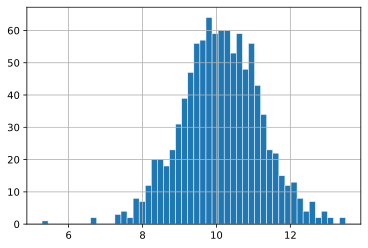

In [39]:
df.log_loss.hist(bins=50, ec='white', lw=0.5)

## Grouping
* Grouping: `group_by` breaks DataFrame into groups

* Apply a function

* `agg` to summarize

* Summary functions include mean, std etc.

In [40]:
df.groupby('kind').mean()

,loss,open,log_loss
kind,,,
A,74849.266760,0.300926,10.627582
B,40757.536846,0.283422,10.226642
C,39618.014479,0.306452,10.049437
D,36309.299776,0.338235,9.967216
E,27615.327829,0.294686,9.731990


## Exercise

Are the claim relativities correct?

### Solution


In [41]:
g = df.groupby('kind').mean()

display(g / g.loc['C'])

print('\n\nBetter\n')
g.loss / g.loc['C', 'loss']

,loss,open,log_loss
kind,,,
A,1.889274,0.981969,1.057530
B,1.028763,0.924852,1.017633
C,1.000000,1.000000,1.000000
D,0.916485,1.103715,0.991818
E,0.697040,0.961607,0.968411




Better



kind
A    1.889274
B    1.028763
C    1.000000
D    0.916485
E    0.697040
Name: loss, dtype: float64

## Grouping and Aggregating

* Very flexible processing for applying different functions

In [42]:
stat_fns =  [np.size, np.mean, np.max]

df.groupby('kind').agg(stat_fns)

loss                              open                log_loss  \
       size          mean           amax size      mean amax     size   
kind                                                                    
A     216.0  74849.266760  726488.800998  216  0.300926    1    216.0   
B     187.0  40757.536846  243801.620473  187  0.283422    1    187.0   
C     186.0  39618.014479  446633.099024  186  0.306452    1    186.0   
D     204.0  36309.299776  284686.621037  204  0.338235    1    204.0   
E     207.0  27615.327829  292226.022443  207  0.294686    1    207.0   

                            
           mean       amax  
kind                        
A     10.627582  13.495978  
B     10.226642  12.404110  
C     10.049437  13.009493  
D      9.967216  12.559144  
E      9.731990  12.585283

## Flexible Application of Aggregation Functions

In [43]:
df.groupby('kind').agg({'loss': stat_fns, 'log_loss': stat_fns[1:] } )

loss                                log_loss           
       size          mean           amax       mean       amax
kind                                                          
A     216.0  74849.266760  726488.800998  10.627582  13.495978
B     187.0  40757.536846  243801.620473  10.226642  12.404110
C     186.0  39618.014479  446633.099024  10.049437  13.009493
D     204.0  36309.299776  284686.621037   9.967216  12.559144
E     207.0  27615.327829  292226.022443   9.731990  12.585283

###  Grouping by Two Variables

* First make the open claims more interesting

* Only apply to the loss variable

In [44]:
df.loc[df.open==1, 'loss'] *= 0.9

g = df.groupby(['kind', 'open'])['loss'].agg([np.size, np.mean, np.max, np.std])

g

size          mean           amax            std
kind open                                                   
A    0     151.0  69541.602153  497775.852555   84899.378072
     1      65.0  78461.441930  653839.920898  122764.808230
B    0     134.0  40856.100548  243801.620473   40819.734594
     1      53.0  36457.504246  111277.305418   27906.493195
C    0     129.0  32665.554292  172805.730537   34494.008285
     1      57.0  49817.276674  401969.789121   69045.337885
D    0     135.0  34004.656417  264012.440797   38972.703406
     1      69.0  36736.546149  256217.958933   48736.193326
E    0     146.0  28125.952763  292226.022443   36103.943565
     1      61.0  23753.858714  130193.290515   23730.888636

### What is the Group By Object?

* Pull off name and group variables separately

In [45]:
for g, x in df.groupby(['kind', 'open']):
    display(g)
    display(x.head())

('A', 0)

,loss,kind,open,log_loss
7,22701.214926,A,0,10.030174
12,17489.098003,A,0,9.769333
23,433359.087410,A,0,12.979322
65,57819.570992,A,0,10.965083
68,5588.850997,A,0,8.628529


('A', 1)

,loss,kind,open,log_loss
5,15367.703928,A,1,9.745384
6,75424.261304,A,1,11.336245
8,19748.274638,A,1,9.996182
22,20593.610035,A,1,10.038097
36,36789.380970,A,1,10.618325


('B', 0)

,loss,kind,open,log_loss
1,100249.453941,B,0,11.515417
3,24538.817836,B,0,10.108012
16,4706.052831,B,0,8.456605
17,25362.252820,B,0,10.141017
25,41641.198084,B,0,10.636845


('B', 1)

,loss,kind,open,log_loss
10,39845.145685,B,1,10.698116
14,68986.661156,B,1,11.247029
19,8225.130194,B,1,9.120310
21,31518.933751,B,1,10.463704
32,15879.727415,B,1,9.778159


('C', 0)

,loss,kind,open,log_loss
15,27722.820033,C,0,10.230011
33,10294.513097,C,0,9.239366
48,10826.538533,C,0,9.289756
58,5046.797844,C,0,8.526509
60,18413.460351,C,0,9.820837


('C', 1)

,loss,kind,open,log_loss
44,60422.358744,C,1,11.114475
53,10450.861124,C,1,9.359800
100,252620.649982,C,1,12.545005
109,15598.871307,C,1,9.760314
111,2369.666478,C,1,7.875865


('D', 0)

,loss,kind,open,log_loss
0,138548.832802,D,0,11.838978
2,6815.725558,D,0,8.826988
28,10766.216165,D,0,9.284168
34,10147.985263,D,0,9.225030
52,5268.739742,D,0,8.569546


('D', 1)

,loss,kind,open,log_loss
4,8443.357363,D,1,9.146496
11,56571.568096,D,1,11.048622
18,12052.216094,D,1,9.502364
30,11648.397816,D,1,9.468284
74,30139.903915,D,1,10.418966


('E', 0)

,loss,kind,open,log_loss
9,292226.022443,E,0,12.585283
13,21173.881954,E,0,9.960524
20,17212.134890,E,0,9.753370
31,61939.478141,E,0,11.033913
41,3104.827859,E,0,8.040714


('E', 1)

,loss,kind,open,log_loss
24,64812.493836,E,1,11.184614
27,8691.489980,E,1,9.175460
55,13047.642985,E,1,9.581723
88,41736.590669,E,1,10.744494
93,13842.925156,E,1,9.640890


### Hence We Can Play Games Like

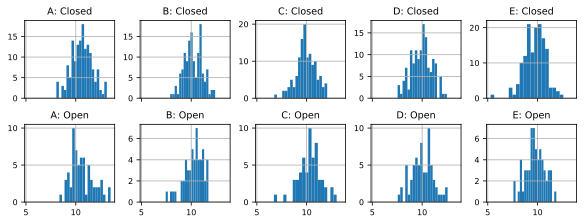

In [46]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

f, axs = plt.subplots(2, 5, sharex=True, sharey=False, constrained_layout=True,
    figsize=(8, 3))
axi = iter(axs.flat)

for g, x in df.groupby(['open', 'kind']):
    ax = x.log_loss.hist(bins=20, ax=next(axi))
    ax.set(title=f"{g[1]}: {'Open' if g[0] else 'Closed'}")

## New Index and Data Transformation

* Go back to our `g` double grouped data frame

* Usual tidyverse spread (unstack) and gather (stack)

* Stack / unstack from shelving and unshelving books

In [47]:
g = df.groupby(['kind', 'open'])['loss'].agg([np.size, np.mean, np.max, np.std])

display(g)

g.unstack(1)

size          mean           amax            std
kind open                                                   
A    0     151.0  69541.602153  497775.852555   84899.378072
     1      65.0  78461.441930  653839.920898  122764.808230
B    0     134.0  40856.100548  243801.620473   40819.734594
     1      53.0  36457.504246  111277.305418   27906.493195
C    0     129.0  32665.554292  172805.730537   34494.008285
     1      57.0  49817.276674  401969.789121   69045.337885
D    0     135.0  34004.656417  264012.440797   38972.703406
     1      69.0  36736.546149  256217.958933   48736.193326
E    0     146.0  28125.952763  292226.022443   36103.943565
     1      61.0  23753.858714  130193.290515   23730.888636

size                mean                         amax                 \
open      0     1             0             1              0              1   
kind                                                                          
A     151.0  65.0  69541.602153  78461.441930  497775.852555  653839.920898   
B     134.0  53.0  40856.100548  36457.504246  243801.620473  111277.305418   
C     129.0  57.0  32665.554292  49817.276674  172805.730537  401969.789121   
D     135.0  69.0  34004.656417  36736.546149  264012.440797  256217.958933   
E     146.0  61.0  28125.952763  23753.858714  292226.022443  130193.290515   

               std                 
open             0              1  
kind                               
A     84899.378072  122764.808230  
B     40819.734594   27906.493195  
C     34494.008285   69045.337885  
D     38972.703406   48736.193326  
E     36103.943565   23730.888636

## Stack Different Dimension

* `df.T` for transpose also available

In [49]:
g.unstack(1).stack(0)

open                   0              1
kind                                   
A    amax  497775.852555  653839.920898
     mean   69541.602153   78461.441930
     size     151.000000      65.000000
     std    84899.378072  122764.808230
B    amax  243801.620473  111277.305418
     mean   40856.100548   36457.504246
     size     134.000000      53.000000
     std    40819.734594   27906.493195
C    amax  172805.730537  401969.789121
     mean   32665.554292   49817.276674
     size     129.000000      57.000000
     std    34494.008285   69045.337885
D    amax  264012.440797  256217.958933
     mean   34004.656417   36736.546149
     size     135.000000      69.000000
     std    38972.703406   48736.193326
E    amax  292226.022443  130193.290515
     mean   28125.952763   23753.858714
     size     146.000000      61.000000
     std    36103.943565   23730.888636

### Access the Indices

* Note the names for the levels

* Row index is an example of a `MultiIndex`

In [50]:
print(g.columns)

g.index

Index(['size', 'mean', 'amax', 'std'], dtype='object')


MultiIndex([('A', 0),
            ('A', 1),
            ('B', 0),
            ('B', 1),
            ('C', 0),
            ('C', 1),
            ('D', 0),
            ('D', 1),
            ('E', 0),
            ('E', 1)],
           names=['kind', 'open'])

## Exercise

Determine the maximum and minimum claim size by kind and open/closed indicator. Display by kind as rows.

### Solution

In [51]:
df.groupby(['kind', 'open'])['loss'].agg([np.min, np.max]).unstack(1)

amin                        amax               
open            0            1              0              1
kind                                                        
A     3142.806940  3843.231866  497775.852555  653839.920898
B     2664.949182  1532.796785  243801.620473  111277.305418
C      850.713997   739.801941  172805.730537  401969.789121
D     1878.080951  1718.707604  264012.440797  256217.958933
E      196.581229  1754.880666  292226.022443  130193.290515

## Stylin'

In [52]:
df.groupby(['kind', 'open'])['loss'].agg([np.min, np.max]).unstack(1).\
    style.format('{:,.1f}')

### More Stylin'

In [53]:
df.groupby(['kind', 'open'])['loss'].agg([np.min, np.max]).\
    unstack(1).style.format('{:,.1f}').\
    background_gradient(subset=[('amax', 0)], cmap='viridis_r').\
    bar(color='#FFA07A', vmin=0, subset=[('amin', 0)], align='zero').\
    set_caption('An Over-Produced DataFrame')

# Module 5:  The CAS Loss Reserve Database

* Read CAS loss reserve database (extract)

* Automatically read csv file from URL

* Add some helpful columns

* Summarize


In [54]:
df = pd.read_csv(r'http://www.mynl.com/RPM/masterdata.csv')
df['LR'] = df.UltIncLoss / df['EarnedPrem']
df.loc[:, 'PdLR'] = df.PaidLoss / df.loc[:, 'EarnedPrem']
 # some company names for future use
sfm = 'State Farm Mut Grp'
amg = 'American Modern Ins Grp Inc'
eix = 'Erie Ins Exchange Grp'
fmg = 'Federated Mut Grp'
wbi = 'West Bend Mut Ins Grp'
vnl = 'Vanliner Ins Co'
df.head().T

,0,1,2,3,4
Line,Comm Auto,Comm Auto,Comm Auto,Comm Auto,Comm Auto
GRCode,266,266,266,266,266
GRName,Public Underwriters Grp,Public Underwriters Grp,Public Underwriters Grp,Public Underwriters Grp,Public Underwriters Grp
AY,1988,1988,1988,1988,1988
DY,1988,1989,1990,1991,1992
Lag,1,2,3,4,5
UltIncLoss,0,0,0,0,0
PaidLoss,0,0,0,0,0
CaseIncLoss,0,0,0,0,0
BulkLoss,0,0,0,0,0


## What Does the DataFrame Contain?

* 10 years development for 10 accident years 1988-97

* Six lines of business

* Variety of companies

In [55]:
print(df.columns)
print('\n\n')
for c in ['AY', 'DY', 'Lag', 'Line']:
    print(c, df[c].unique(), '\n')

for c in ['AY', 'DY', 'Lag', 'Line']:
    print(c, df[c].value_counts(), '\n')

Index(['Line', 'GRCode', 'GRName', 'AY', 'DY', 'Lag', 'UltIncLoss', 'PaidLoss',
       'CaseIncLoss', 'BulkLoss', 'EarnedPrem', 'PostedReserve97', 'LR',
       'PdLR'],
      dtype='object')



AY [1988 1989 1990 1991 1992 1993 1994 1995 1996 1997] 

DY [1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006] 

Lag [ 1  2  3  4  5  6  7  8  9 10] 

Line ['Comm Auto' 'PP Auto' 'Work Comp' 'Products Liab' 'Other Liab' 'Med Mal'] 

AY 1997    7790
1996    7790
1995    7790
1994    7790
1993    7790
1992    7790
1991    7790
1990    7790
1989    7790
1988    7790
Name: AY, dtype: int64 

DY 1997    7790
1996    7011
1998    7011
1999    6232
1995    6232
2000    5453
1994    5453
2001    4674
1993    4674
2002    3895
1992    3895
2003    3116
1991    3116
2004    2337
1990    2337
1989    1558
2005    1558
2006     779
1988     779
Name: DY, dtype: int64 

Lag 10    7790
9     7790
8     7790
7     7790
6     7790
5     7790
4     7790
3     7790
2

## Summarizing The Data

* If **not** analyzing triangles need `Lag==10` subset to avoid double counting!

* Let's give more meaningful index

In [56]:
dfl = df.query(' Lag == 10 ').copy()

dfl = dfl.set_index(['GRName', 'AY', 'Lag', 'Line'], drop=True)

dfl = dfl.drop('GRCode', axis=1)

dfl.head()

DY  UltIncLoss  PaidLoss  \
GRName                  AY   Lag Line                                    
Public Underwriters Grp 1988 10  Comm Auto  1997         0.0       0.0   
                        1989 10  Comm Auto  1998        24.0      24.0   
                        1990 10  Comm Auto  1999       128.0     128.0   
                        1991 10  Comm Auto  2000       374.0     376.0   
                        1992 10  Comm Auto  2001       386.0     386.0   

                                            CaseIncLoss  BulkLoss  EarnedPrem  \
GRName                  AY   Lag Line                                           
Public Underwriters Grp 1988 10  Comm Auto          0.0       0.0         0.0   
                        1989 10  Comm Auto         24.0       0.0        25.0   
                        1990 10  Comm Auto        128.0       0.0       265.0   
                        1991 10  Comm Auto        376.0      -2.0       512.0   
                        1992 10  Comm Auto        386.0       0.0       578.0   

                                            PostedReserve97        LR  \
GRName                  AY   Lag Line                                   
Public Underwriters Grp 1988 10  Comm Auto            932.0       NaN   
                        1989 10  Comm Auto            932.0  0.960000   
                        1990 10  Comm Auto            932.0  0.483019   
                        1991 10  Comm Auto            932.0  0.730469   
                        1992 10  Comm Auto            932.0  0.667820   

                                                PdLR  
GRName                  AY   Lag Line                 
Public Underwriters Grp 1988 10  Comm Auto       NaN  
                        1989 10  Comm Auto  0.960000  
                        1990 10  Comm Auto  0.483019  
                        1991 10  Comm Auto  0.734375  
                        1992 10  Comm Auto  0.667820

## Accessing Chunks

* `sfm` defined earlier to be State Farm Mut Grp

In [57]:
dfl.xs([sfm, 'Comm Auto'], axis=0, level=[0,3])

,,DY,UltIncLoss,PaidLoss,CaseIncLoss,BulkLoss,EarnedPrem,PostedReserve97,LR,PdLR
AY,Lag,,,,,,,,,
1988,10,1997,194099.0,193499.0,194000.0,99.0,286378.0,360657.0,0.677772,0.675677
1989,10,1998,201380.0,200480.0,201294.0,86.0,308908.0,360657.0,0.651909,0.648996
1990,10,1999,226263.0,225430.0,226160.0,103.0,326503.0,360657.0,0.692989,0.690438
1991,10,2000,207092.0,206719.0,206945.0,147.0,332616.0,360657.0,0.622616,0.621494
1992,10,2001,215141.0,214524.0,214993.0,148.0,341890.0,360657.0,0.629270,0.627465
1993,10,2002,233698.0,233365.0,233597.0,101.0,355840.0,360657.0,0.656750,0.655814
1994,10,2003,244692.0,244280.0,244619.0,73.0,379781.0,360657.0,0.644298,0.643213
1995,10,2004,241793.0,240184.0,241455.0,338.0,398755.0,360657.0,0.606370,0.602335
1996,10,2005,237781.0,237368.0,237475.0,306.0,406609.0,360657.0,0.584790,0.583775


## Group by with MultiIndex

In [58]:
dfl.groupby(level=[1,3])[['UltIncLoss', 'EarnedPrem']].sum().unstack(1)

UltIncLoss                                                            \
Line  Comm Auto   Med Mal Other Liab     PP Auto Products Liab  Work Comp   
AY                                                                          
1988   629146.0  236376.0   328473.0   8723062.0      123424.0  1356500.0   
1989   679414.0  237395.0   366759.0   9870347.0      124336.0  1445765.0   
1990   726503.0  262249.0   392439.0  10802161.0      146666.0  1554171.0   
1991   727376.0  315757.0   524221.0  10837480.0      132101.0  1612650.0   
1992   765710.0  320631.0   467603.0  11787696.0      106058.0  1574927.0   
1993   830545.0  362781.0   566647.0  12739786.0      144790.0  1467168.0   
1994   904815.0  382585.0   654164.0  13632965.0      177498.0  1474044.0   
1995   912869.0  409188.0   562204.0  13899232.0      183228.0  1440604.0   
1996   939756.0  400431.0   615897.0  13874235.0      157095.0  1413239.0   
1997   956165.0  457300.0   623342.0  13707698.0      184220.0  1439364.0   

     EarnedPrem                                                            
Line  Comm Auto   Med Mal Other Liab     PP Auto Products Liab  Work Comp  
AY                                                                         
1988   913636.0  404488.0   508339.0  10107939.0      235644.0  1691130.0  
1989   964262.0  402102.0   563072.0  11273079.0      227284.0  1797930.0  
1990  1054021.0  397295.0   591095.0  12635305.0      224264.0  1880315.0  
1991  1122954.0  379902.0   626758.0  13888032.0      223209.0  2064835.0  
1992  1170269.0  389158.0   649326.0  15195554.0      208902.0  2189448.0  
1993  1213680.0  383636.0   711909.0  16367985.0      212161.0  2482657.0  
1994  1309786.0  414245.0   807854.0  17696504.0      234670.0  2594787.0  
1995  1336249.0  456096.0   917859.0  18844853.0      248951.0  2616831.0  
1996  1358266.0  471526.0   962713.0  19553861.0      253235.0  2420655.0  
1997  1369835.0  486309.0   944625.0  20038602.0      234381.0  2207902.0

## Exercise

* Compute weighted average ultimate loss ratio by line by year

### Solution

In [59]:
s = dfl.groupby(level=[1,3])[['UltIncLoss', 'EarnedPrem']].sum()
s['LR'] = s.UltIncLoss / s.EarnedPrem
s = s['LR'].unstack(1)
s.style.format('{:.1%}')

Line,Comm Auto,Med Mal,Other Liab,PP Auto,Products Liab,Work Comp
AY,,,,,,
1988,68.9%,58.4%,64.6%,86.3%,52.4%,80.2%
1989,70.5%,59.0%,65.1%,87.6%,54.7%,80.4%
1990,68.9%,66.0%,66.4%,85.5%,65.4%,82.7%
1991,64.8%,83.1%,83.6%,78.0%,59.2%,78.1%
1992,65.4%,82.4%,72.0%,77.6%,50.8%,71.9%
1993,68.4%,94.6%,79.6%,77.8%,68.2%,59.1%
1994,69.1%,92.4%,81.0%,77.0%,75.6%,56.8%
1995,68.3%,89.7%,61.3%,73.8%,73.6%,55.1%
1996,69.2%,84.9%,64.0%,71.0%,62.0%,58.4%


# Module 6: Make A Triangle!

* Standard `pivot_table` functionality

* Extol virtues of zero-based arrays, `lag` starts at 0

In [60]:
bigCos =[sfm, amg, eix, fmg, wbi, vnl]
df['Lag'] -= 1
bit = df.query(f' GRName in @bigCos ').\
    pivot_table(index=['GRName', 'Line', 'AY'], columns='Lag', values='PaidLoss')
bit.tail(20)

Lag                                             0        1        2        3  \
GRName                Line          AY                                         
West Bend Mut Ins Grp Products Liab 1988     10.0     45.0     60.0    110.0   
                                    1989     37.0     81.0    146.0    167.0   
                                    1990     61.0     94.0    120.0    160.0   
                                    1991     61.0    156.0    201.0    447.0   
                                    1992     41.0    145.0    194.0    323.0   
                                    1993     91.0    243.0    316.0    399.0   
                                    1994     72.0    137.0    269.0    477.0   
                                    1995    101.0    164.0    513.0    665.0   
                                    1996    142.0    249.0    280.0    334.0   
                                    1997     79.0    210.0    424.0    504.0   
                      Work Comp     1988   3057.0   6033.0   7461.0   8276.0   
                                    1989   4139.0   8141.0   9770.0  10651.0   
                                    1990   6115.0  11368.0  13790.0  14722.0   
                                    1991   7090.0  13174.0  16314.0  18117.0   
                                    1992   8063.0  16100.0  19463.0  21409.0   
                                    1993   9736.0  18500.0  21929.0  24100.0   
                                    1994  10255.0  19745.0  23968.0  25990.0   
                                    1995  11270.0  21944.0  27107.0  30324.0   
                                    1996  11984.0  23447.0  28740.0  31505.0   
                                    1997  11690.0  22783.0  27484.0  29611.0   

Lag                                             4        5        6        7  \
GRName                Line          AY                                         
West Bend Mut Ins Grp Products Liab 1988    132.0    186.0    186.0    186.0   
                                    1989    190.0    247.0    254.0    258.0   
                                    1990    211.0    216.0    218.0    220.0   
                                    1991    791.0   1004.0   1417.0   1715.0   
                                    1992    378.0    497.0    517.0    517.0   
                                    1993    470.0    642.0    691.0    743.0   
                                    1994    636.0    844.0    993.0    970.0   
                                    1995    880.0   1155.0   1560.0   1682.0   
                                    1996    390.0    396.0    399.0    579.0   
                                    1997    610.0   1160.0   1539.0   1534.0   
                      Work Comp     1988   8517.0   8766.0   8899.0   8991.0   
                                    1989  11001.0  11330.0  11446.0  11563.0   
                                    1990  15278.0  15501.0  15615.0  15726.0   
                                    1991  18394.0  18721.0  19011.0  19196.0   
                                    1992  22441.0  22961.0  23056.0  23202.0   
                                    1993  25213.0  25580.0  26063.0  26283.0   
                                    1994  27388.0  27961.0  28256.0  28417.0   
                                    1995  31653.0  32403.0  32873.0  33452.0   
                                    1996  33353.0  34369.0  34727.0  35062.0   
                                    1997  30878.0  31474.0  31815.0  32098.0   

Lag                                             8        9  
GRName                Line          AY                      
West Bend Mut Ins Grp Products Liab 1988    186.0    186.0  
                                    1989    258.0    258.0  
                                    1990    223.0    250.0  
                                    1991   1723.0   1724.0  
                                    1992    518.0    518.0  
                                    1993    748.0  

## Link Ratios

* Use integer indexing...

In [61]:
trg = bit.xs((vnl, 'Comm Auto'))
display(trg)
link = trg.iloc[:, 1:] / trg.iloc[:, :-1]
link

Lag,0,1,2,3,4,5,6,7,8,9
AY,,,,,,,,,,
1988,981.0,3618.0,4832.0,7434.0,8158.0,9176.0,9346.0,10072.0,10074.0,10074.0
1989,2063.0,6144.0,12431.0,17103.0,19201.0,20087.0,20344.0,20995.0,20991.0,21002.0
1990,3434.0,8344.0,14294.0,21371.0,24809.0,27236.0,27609.0,28515.0,28691.0,29115.0
1991,3894.0,5752.0,14859.0,21971.0,27456.0,29822.0,30879.0,31497.0,31967.0,31971.0
1992,4710.0,10714.0,20395.0,29704.0,35521.0,37604.0,39160.0,39748.0,39971.0,40573.0
1993,6468.0,15469.0,26759.0,37437.0,42680.0,46145.0,48244.0,49053.0,49098.0,49168.0
1994,6611.0,13879.0,23464.0,30120.0,34970.0,37817.0,38603.0,38760.0,39347.0,39970.0
1995,7656.0,15973.0,23651.0,29950.0,34268.0,35368.0,36591.0,36804.0,36855.0,36987.0
1996,4037.0,7106.0,10167.0,13603.0,16162.0,17182.0,18612.0,18642.0,18667.0,18706.0


Lag,0,1,2,3,4,5,6,7,8,9
AY,,,,,,,,,,
1988,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1989,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1990,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1991,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1992,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1993,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1994,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1995,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1996,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN



* Index-awareness is *usually* helpful!

## Link Ratios...Correctly

* `to_numpy()` or `values` converts into an array, drops index information

* Pick up column index from denominator---retains zero base

In [62]:
link = trg.iloc[:, 1:].to_numpy() / trg.iloc[:, :-1]
link

Lag,0,1,2,3,4,5,6,7,8
AY,,,,,,,,,
1988,3.688073,1.335544,1.538493,1.097390,1.124785,1.018527,1.077680,1.000199,1.000000
1989,2.978187,2.023275,1.375835,1.122669,1.046143,1.012794,1.032000,0.999809,1.000524
1990,2.429819,1.713087,1.495103,1.160872,1.097827,1.013695,1.032815,1.006172,1.014778
1991,1.477144,2.583275,1.478632,1.249647,1.086174,1.035444,1.020014,1.014922,1.000125
1992,2.274735,1.903584,1.456435,1.195832,1.058641,1.041379,1.015015,1.005610,1.015061
1993,2.391620,1.729847,1.399043,1.140049,1.081186,1.045487,1.016769,1.000917,1.001426
1994,2.099380,1.690612,1.283669,1.161023,1.081413,1.020784,1.004067,1.015144,1.015833
1995,2.086338,1.480686,1.266331,1.144174,1.032100,1.034579,1.005821,1.001386,1.003582
1996,1.760218,1.430763,1.337956,1.188120,1.063111,1.083227,1.001612,1.001341,1.002089


## Trim-Up to an Historical Triangle

* Compute all the triangles at once...

* Drop 1997 year

In [63]:
bit = df.query(f' GRName in @bigCos and Lag + AY <= 1997 ').pivot_table(index=['GRName', 'Line', 'AY'], columns='Lag', values='PaidLoss')
link = bit.iloc[:, 1:].to_numpy() / bit.iloc[:, :-1]
link.drop(1997, axis=0, level=2).head(19)
link.tail(20)

Lag                                              0         1         2  \
GRName                Line          AY                                   
West Bend Mut Ins Grp Products Liab 1988  4.500000  1.333333  1.833333   
                                    1989  2.189189  1.802469  1.143836   
                                    1990  1.540984  1.276596  1.333333   
                                    1991  2.557377  1.288462  2.223881   
                                    1992  3.536585  1.337931  1.664948   
                                    1993  2.670330  1.300412  1.262658   
                                    1994  1.902778  1.963504  1.773234   
                                    1995  1.623762  3.128049       NaN   
                                    1996  1.753521       NaN       NaN   
                                    1997       NaN       NaN       NaN   
                      Work Comp     1988  1.973503  1.236698  1.109235   
                                    1989  1.966900  1.200098  1.090174   
                                    1990  1.859035  1.213054  1.067585   
                                    1991  1.858110  1.238348  1.110519   
                                    1992  1.996775  1.208882  1.099985   
                                    1993  1.900164  1.185351  1.099001   
                                    1994  1.925402  1.213877  1.084362   
                                    1995  1.947116  1.235281       NaN   
                                    1996  1.956525       NaN       NaN   
                                    1997       NaN       NaN       NaN   

Lag                                              3         4         5  \
GRName                Line          AY                                   
West Bend Mut Ins Grp Products Liab 1988  1.200000  1.409091  1.000000   
                                    1989  1.137725  1.300000  1.028340   
                                    1990  1.318750  1.023697  1.009259   
                                    1991  1.769575  1.269279  1.411355   
                                    1992  1.170279  1.314815       NaN   
                                    1993  1.177945       NaN       NaN   
                                    1994       NaN       NaN       NaN   
                                    1995       NaN       NaN       NaN   
                                    1996       NaN       NaN       NaN   
                                    1997       NaN       NaN       NaN   
                      Work Comp     1988  1.029120  1.029236  1.015172   
                                    1989  1.032861  1.029906  1.010238   
                                    1990  1.037767  1.014596  1.007354   
                                    1991  1.015290  1.017778  1.015491   
                                    1992  1.048204  1.023172       NaN   
                                    1993  1.046183       NaN       NaN   
                                    1994       NaN       NaN       NaN   
                                    1995       NaN       NaN       NaN   
                                    1996       NaN       NaN       NaN   
                                    1997       NaN       NaN       NaN   

Lag                                              6         7         8  
GRName                Line          AY                                  
West Bend Mut Ins Grp Products Liab 1988  1.000000  1.000000  1.000000  
                                    1989  1.015748  1.000000       NaN  
                                    1990  1.009174       NaN       NaN  
                                    1991       NaN       NaN       NaN  
                                    1992       NaN       NaN       NaN  
                                    1993       NaN       NaN       NaN  
                                    1994       NaN       NaN       NaN  
                                    1995       NaN       NaN       NaN  
            

# THE END